# Gradient Descent from Scratch

Walking over the loss surface using an explicit update rule.

## Objective

Implement Gradient Descent from first principles to observe how
parameters evolve over the loss surface defined previously.

The goal is to understand update dynamics, not to optimize performance.

## Scope

This notebook focuses on:
* Explicit Gradient Descent implementation
* Parameter update dynamics
* Loss trajectory over iterations

## Out of scope

This notebook explicitly excludes:
* Learning rate tuning
* Stopping heuristics
* Regularization
* Performance comparison with libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data-generating process

The same linear synthetic dataset is reused to ensure that
observed behavior is driven by optimization dynamics,
not by changes in data or model structure.

In [2]:
X = np.linspace(0, 10, 50)
y = 3.0 * X + 5.0 + np.random.normal(0, 2, size=len(X))

## Loss function and gradients

Mean Squared Error is used as the loss function.
Gradients are derived analytically and implemented explicitly.

In [3]:
def mse_loss(w, b, X, y):
    y_pred = w * X + b
    return np.mean((y - y_pred) ** 2)

def mse_gradients(w, b, X, y):
    y_pred = w * X + b
    dw = -2 * np.mean(X * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    return dw, db

## Parameter initialization

Parameters are initialized away from the optimum to make
the optimization trajectory observable.

In [4]:
w = 0.0
b = 0.0

learning_rate = 0.01
n_iterations = 100

## Gradient Descent updates

At each iteration:
* Gradients are computed
* Parameters are updated
* Loss is recorded

In [5]:
loss_history = []
w_history = []
b_history = []

for _ in range(n_iterations):
    dw, db = mse_gradients(w, b, X, y)
    w -= learning_rate * dw
    b -= learning_rate * db

    loss_history.append(mse_loss(w, b, X, y))
    w_history.append(w)
    b_history.append(b)

## Loss trajectory

The loss curve shows how the system progresses toward the minimum.

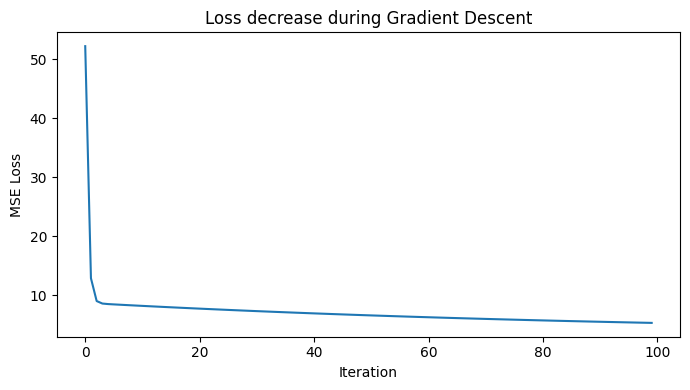

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss decrease during Gradient Descent")
plt.tight_layout()
plt.show()

## Parameter trajectory

Parameter evolution illustrates how Gradient Descent moves
through parameter space.

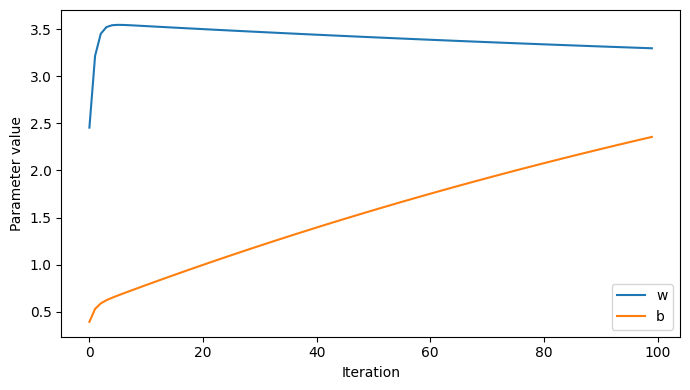

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(w_history, label="w")
plt.plot(b_history, label="b")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.legend()
plt.tight_layout()
plt.show()

## Interpretation

With a stable learning rate and a convex loss surface,
Gradient Descent converges smoothly toward the global minimum.

The behavior observed is a direct consequence of:
* Loss geometry
* Update rule
* Step size

## Takeaway

Gradient Descent is not an optimizer to be trusted blindly.

Its behavior is predictable once the geometry and dynamics
are made explicit.